<a href="https://colab.research.google.com/github/tomdv18/TPM-2-numerico/blob/sss/TP1_ORGA_DE_DATOS_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

V3) Reproduzca exactamente esta visualización

 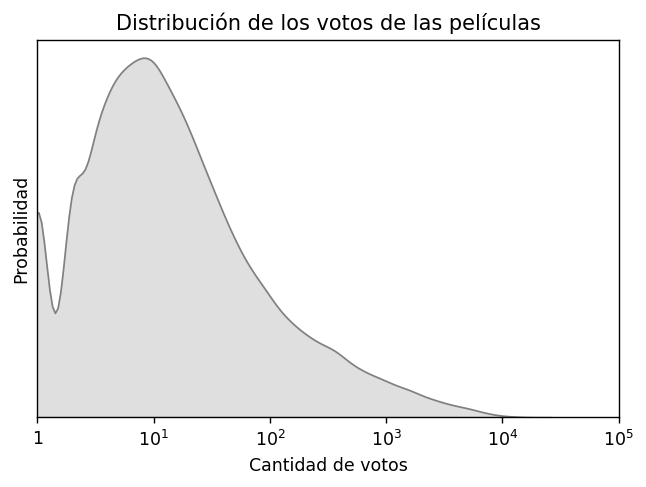

In [ ]:
import pandas as pd

df_movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Intercambio los valores que tienen conflictos en sus ID

In [ ]:

df_movies.at[19730,"id"] = 1
df_movies.at[19730,"release_date"] = "1997-08-20"

df_movies.at[29503, "id"] = 12
df_movies.at[29503,"release_date"] = "2012-09-29"

df_movies.at[35587, "id"] = 22
df_movies.at[35587,"release_date"] = "2014-01-01"

In [ ]:
df_movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"Adventure,Fantasy,Family",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"Romance,Comedy",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"Comedy,Drama,Romance",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"Drama,Family",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"Action,Drama,Thriller",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


Del DataFrame original solo me quedo con 3 columnas que podrian ser relevantes
Además me fijo que el recuento de votos no tenga NaN y sea mayor que cero

In [ ]:

df_reducido = df_movies[["id","vote_average", "vote_count"]]
df_reducido["vote_count"] = df_reducido["vote_count"].fillna(-1)
df_reducido = df_reducido[df_reducido["vote_count"] > 0 ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_reducido

,id,vote_average,vote_count
0,862,7.7,5415.0
1,8844,6.9,2413.0
2,15602,6.5,92.0
3,31357,6.1,34.0
4,11862,5.7,173.0
...,...,...,...
45459,222848,3.5,1.0
45460,30840,5.7,26.0
45461,439050,4.0,1.0
45462,111109,9.0,3.0


Text(0, 0.5, 'Probabilidad')

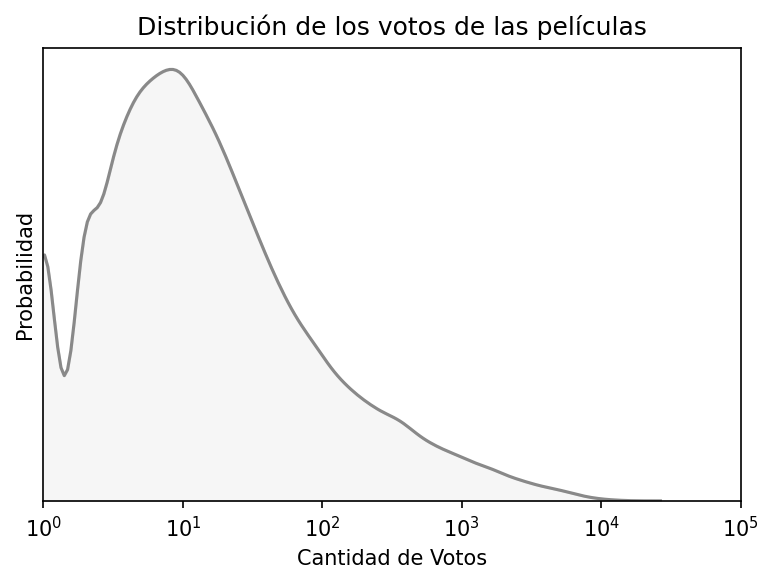

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(dpi = 150)
sns.kdeplot(  df_reducido["vote_count"],fill = True, log_scale = True, color ="#dfdfdf")
sns.kdeplot(  df_reducido["vote_count"], log_scale = True, color ="#898989")
plt.tick_params(
    axis='x',
    which='minor',
    bottom=False,
    top=False,
    labelbottom=False)
plt.xlim(1, 10e+4)
plt.title("Distribución de los votos de las películas")
plt.yticks([])
plt.xlabel("Cantidad de Votos")
plt.ylabel("Probabilidad")